In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('house_rental_data.csv.txt', index_col = 0)

In [3]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [4]:
df.shape

(645, 7)

In [5]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [7]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [8]:
df['Floor'].value_counts()

2     103
5      88
4      75
6      75
3      69
7      42
8      36
10     34
9      26
1      22
11     19
13     14
12     13
19      7
14      6
15      4
21      4
18      3
16      2
17      2
22      1
Name: Floor, dtype: int64

In [9]:
df['TotalFloor'].value_counts()

7     161
12    113
14     68
4      36
6      36
9      30
5      30
13     30
15     28
21     18
19     17
11     16
16     13
25     10
17      8
18      8
10      8
24      4
8       3
20      2
27      2
3       1
38      1
26      1
1       1
Name: TotalFloor, dtype: int64

In [10]:
df['Bedroom'].value_counts()

3    239
2    161
4    161
1     69
5     13
6      1
7      1
Name: Bedroom, dtype: int64

In [11]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [12]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


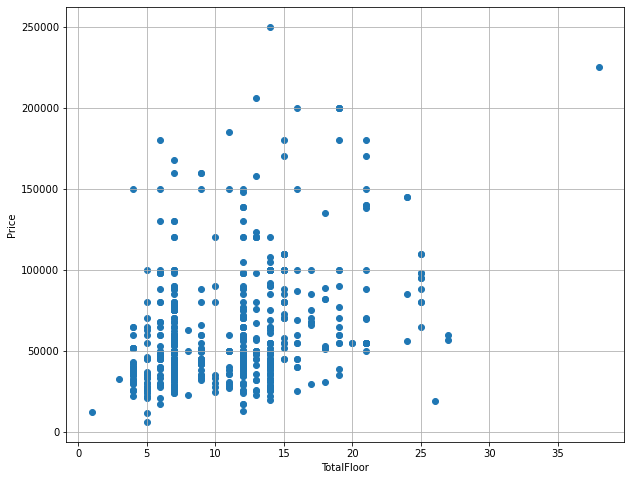

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(df["TotalFloor"],df["Price"])
plt.xlabel("TotalFloor")
plt.ylabel("Price")
plt.grid()
plt.show()

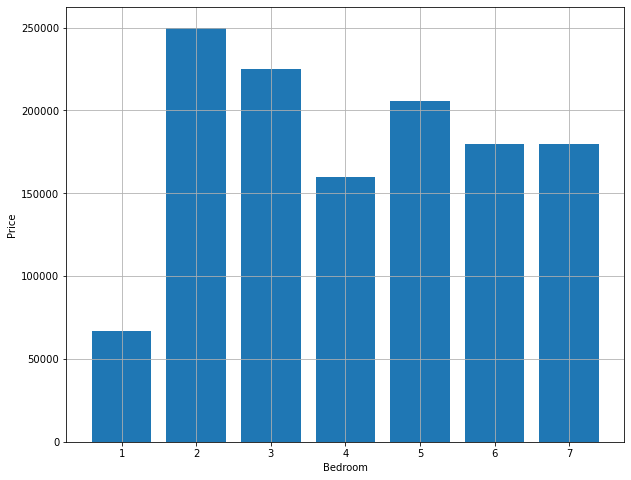

In [14]:
plt.figure(figsize=(10,8))
plt.bar(df["Bedroom"],df["Price"])
plt.xlabel("Bedroom")
plt.ylabel("Price")
plt.grid()
plt.show()

In [15]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsRegressor

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [18]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [19]:
x_axis=[]
y_axis=[]
for i in range(1,26,2):
    reg=KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(reg,x_train,y_train,cv=KFold(n_splits=5))
    x_axis.append(i)
    y_axis.append(score.mean())

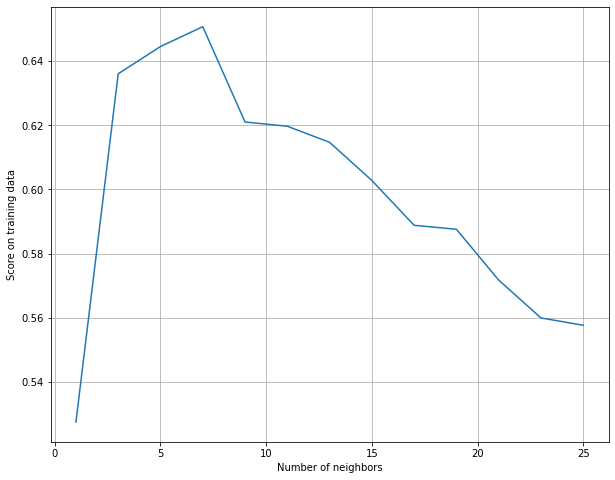

In [20]:
plt.figure(figsize=(10,8))
plt.plot(x_axis,y_axis)
plt.xlabel("Number of neighbors")
plt.ylabel("Score on training data")
plt.grid()
plt.show()

In [21]:
reg=KNeighborsRegressor(n_neighbors=7)
reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [22]:
y_pred=reg.predict(x_test)

In [23]:
score_test=reg.score(x_test,y_test)
score_test

0.652787353691312